# FIREMAN PROJECT NOTEBOOK - SUPERVISED MACHINE LEARNING

In [1]:
# define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# https://xgboost.readthedocs.io/en/latest/
import xgboost
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
# defining scoring strategy:
# https://scikit-learn.org/stable/modules/model_evaluation.html#defining-your-scoring-strategy-from-metric-functions
# scoring needs to be changed with string, ie : LogisticRegressionCV(cv=10, random_state=0,multi_class='multinomial', scoring="f1_score").fit(samples, labels)
# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score


# 1 Supervised machine learning

## 1.1 Dataset preparation

In [2]:
#dataset_pd = pd.read_csv('Tennessee_Event-Driven/datasets/dataset_standard_scaled.csv',index_col=False)
dataset_pd = pd.read_csv('Tennessee_Event-Driven/datasets/dataset.csv',index_col=False)
labels = dataset_pd['fault_id'].values
dataset = dataset_pd.drop(columns=['fault_id']).values

dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset, labels, test_size=0.1)

## 1.2 Selected supervised algorithms (Logistic Regression, SVM, XGBOOST)

In [1]:
# logistic regression
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
# solver = ?
LR_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LRscores = cross_val_score(LR_clf, dataset, labels, cv=10, scoring='f1_weighted')
LR_clf.fit(dataset_train, labels_train)
LR_predicted = LR_clf.predict(dataset_test)
print('LR 10CV f1_weighted scores : ' + str(LRscores))
print('LR classification report :\n' + str(classification_report(labels_test, LR_predicted)))
print('LR confusion matrix :\n' + str(confusion_matrix(labels_test, LR_predicted)))

# SVM
# about gamma='scale' issue : https://stackoverflow.com/questions/52582796/support-vector-regression-typeerror-must-be-real-number-not-str
SVM_clf = svm.SVC(decision_function_shape='ovo')
SVMscores = cross_val_score(SVM_clf, dataset, labels, cv=10, scoring='f1_weighted')
SVM_clf.fit(dataset_train, labels_train)
SVM_predicted = SVM_clf.predict(dataset_test)
print('SVM 10CV f1_weighted scores : ' + str(SVMscores))
print('SVM classification report :\n' + str(classification_report(labels_test, SVM_predicted)))
print('SVM confusion matrix :\n' + str(confusion_matrix(labels_test, SVM_predicted)))

# xgboost
XGBOOST_clf = xgboost.XGBClassifier()
XGBOOSTscores = cross_val_score(XGBOOST_clf, dataset, labels, cv=10, scoring='f1_weighted')
XGBOOST_clf.fit(dataset_train, labels_train)
XGBOOST_predicted = XGBOOST_clf.predict(dataset_test)
print('XGBOOST 10CV f1_weighted scores : ' + str(XGBOOSTscores))
print('XGBOOST classification report :\n' + str(classification_report(labels_test, XGBOOST_predicted)))
print('XGBOOST confusion matrix :\n' + str(confusion_matrix(labels_test, XGBOOST_predicted)))
print('XGBOOST features importances :\n' + str(XGBOOST_clf.feature_importances_))

## 1.3 Algorithm evaluation (saved in md - easier to read)
### 1.3.1 Original dataset

LR 10CV f1_weighted scores : 

    [0.16342272 0.21371998 0.26320051 0.13632829 0.08067881 0.17990401 0.22716928 0.22688933 0.27647848 0.24160984]
LR classification report :

              precision    recall  f1-score   support

           0       0.05      0.06      0.05       132
           1       0.82      0.92      0.87       130
           2       0.89      0.81      0.85       155
           3       0.00      0.00      0.00       149
           4       0.21      0.03      0.05       141
           5       0.08      0.33      0.13       138
           6       0.79      0.81      0.80       129
           7       0.57      0.62      0.59       122
           8       0.13      0.03      0.05       138
           9       0.00      0.00      0.00       174
          10       0.13      0.06      0.08       145
          11       0.07      0.08      0.07       142
          12       0.04      0.08      0.05       132
          13       0.21      0.42      0.27       149
          14       0.08      0.01      0.02       142
          15       0.12      0.04      0.06       137
          16       0.14      0.03      0.05       145
          17       0.24      0.11      0.15       165
          18       0.81      0.55      0.66       134
          19       0.00      0.00      0.00       161
          20       0.17      0.45      0.25       150
          21       0.17      0.37      0.23       160

        accuracy                       0.26      3170
       macro avg   0.26      0.26      0.24      3170
    weighted avg   0.25      0.26      0.23      3170

LR confusion matrix :

    [[  8   0   0   0   0  29   0   3   1   0   3  12  16   8   3   9   0   3   0   0  23  14]
     [  1 119   0   0   0   3   1   1   0   0   0   0   2   3   0   0   0   0   0   0   0   0]
     [  6   0 126   0   0   6   0   0   0   0   0   0   7   4   1   1   0   0   0   0   3   1]
     [ 17   0   0   0   0  39   0   2   4   0   5  11   9   6   2   3   2   2   0   0  30  17]
     [  9   0   0   0   4  35   0   3   1   0   2  15  11  15   1   1   0   7   0   0  21  16]
     [ 12   0   0   0   0  45   0   0   1   0   4   9  10  11   1   2   1   3   2   0  14  23]
     [  0   8   0   0   0   4 105   0   0   0   1   2   4   0   0   1   1   2   0   0   1   0]
     [  1   0   1   0   0   6   0  76   0   0   0   1   0   5   0   1   0   0   8   0   8  15]
     [  3   8   1   0   0  27   6   6   4   0   2   6   7  19   1   2   0   2   2   0  21  21]
     [ 14   0   0   0   0  48   0   5   3   0   7  16  22  12   2   6   3   3   0   0  16  17]
     [ 11   0   0   0   0  37   0   4   0   0   9   8  17  19   0   1   1   2   0   0  16  20]
     [  8   0   0   0   3  29   0   2   1   1   2  12  18  14   1   2   2   6   0   0  19  22]
     [  6   2   3   0   0  20   5   5   1   0   0   7  10  32   0   0   0   1   3   0  27  10]
     [  1   7  11   0   0   7  16   0   2   0   0   6   8  62   1   0   0   0   1   0   6  21]
     [  8   0   0   0  12  30   0   5   3   1   5   9  22   9   2   2   2   8   0   0  17   7]
     [ 11   0   0   0   0  31   0   2   2   0   5  14  14  13   0   6   2   5   0   0  20  12]
     [  4   0   0   0   0  34   0   5   2   0   6  11  17  17   1   3   4   2   0   0  14  25]
     [ 11   0   0   0   0  37   0   2   1   0   8   7  22  14   2   2   0  18   1   0  20  20]
     [  6   0   0   0   0  17   0   2   1   0   0   3   2   1   1   0   2   1  74   0  15   9]
     [ 17   0   0   0   0  30   0   7   4   0   6  14  19   8   4   3   3   5   0   0  28  13]
     [  7   1   0   0   0  24   0   4   0   0   2   7   7  17   1   1   3   3   0   0  67   6]
     [  8   0   0   0   0  25   0   0   0   0   4   8  23  13   2   2   3   3   0   0  10  59]]
SVM 10CV f1_weighted scores : 

    [0.05144833 0.09921728 0.14017369 0.06610122 0.00966727 0.0795256 0.12925121 0.12923113 0.12579217 0.12894373]
SVM classification report :

              precision    recall  f1-score   support

           0       0.05      1.00      0.09       132
           1       0.00      0.00      0.00       130
           2       0.54      0.79      0.65       155
           3       0.00      0.00      0.00       149
           4       0.00      0.00      0.00       141
           5       0.00      0.00      0.00       138
           6       1.00      0.74      0.85       129
           7       0.00      0.00      0.00       122
           8       0.00      0.00      0.00       138
           9       0.00      0.00      0.00       174
          10       0.00      0.00      0.00       145
          11       0.00      0.00      0.00       142
          12       0.00      0.00      0.00       132
          13       0.00      0.00      0.00       149
          14       0.00      0.00      0.00       142
          15       0.00      0.00      0.00       137
          16       0.00      0.00      0.00       145
          17       0.00      0.00      0.00       165
          18       0.85      0.53      0.65       134
          19       0.00      0.00      0.00       161
          20       0.00      0.00      0.00       150
          21       0.00      0.00      0.00       160

        accuracy                       0.13      3170
       macro avg   0.11      0.14      0.10      3170
    weighted avg   0.11      0.13      0.10      3170

SVM confusion matrix :

    [[132   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [129   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [ 32   0 123   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [131   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [ 32   1   0   0   0   0  96   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [103   0  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [123   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [174   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [144   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [142   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [110   0  21   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0]
     [105   0  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  12   0   0   0]
     [142   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [135   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [144   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [165   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [ 59   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  71   0   0   0]
     [161   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
     [160   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

XGBOOST 10CV f1_weighted scores : 
    
    [0.68392688 0.74462579 0.74093651 0.36879107 0.41598073 0.72445736 0.73242177 0.7663613  0.70552416 0.75007832]
XGBOOST classification report :

              precision    recall  f1-score   support

           0       0.21      0.45      0.28       132
           1       1.00      0.94      0.97       130
           2       1.00      0.87      0.93       155
           3       0.33      0.44      0.38       149
           4       0.94      0.90      0.92       141
           5       0.94      0.87      0.90       138
           6       1.00      0.88      0.93       129
           7       1.00      0.94      0.97       122
           8       0.96      0.79      0.87       138
           9       0.37      0.37      0.37       174
          10       0.75      0.61      0.67       145
          11       0.73      0.74      0.73       142
          12       0.92      0.80      0.86       132
          13       0.94      0.79      0.85       149
          14       0.98      0.84      0.90       142
          15       0.23      0.42      0.30       137
          16       0.81      0.66      0.73       145
          17       0.89      0.78      0.83       165
          18       1.00      0.73      0.84       134
          19       0.68      0.66      0.67       161
          20       0.75      0.59      0.66       150
          21       1.00      0.93      0.96       160

        accuracy                       0.72      3170
       macro avg   0.79      0.73      0.75      3170
    weighted avg   0.79      0.72      0.75      3170

XGBOOST confusion matrix :

    [[ 59   0   0  20   0   1   0   0   0  17   3   5   0   0   0  19   0   0   0   7   1   0]
     [  5 122   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   1   0]
     [ 10   0 135   0   0   0   0   0   0   0   0   0   0   0   0   9   0   0   0   1   0   0]
     [ 26   0   0  65   0   1   0   0   0  20   0   3   0   0   0  17   2   4   0   8   3   0]
     [  4   0   0   3 127   1   0   0   0   0   0   1   0   0   0   4   0   0   0   1   0   0]
     [  7   0   0   0   1 120   0   0   0   4   0   1   1   0   0   4   0   0   0   0   0   0]
     [ 11   0   0   1   0   0 113   0   0   1   0   0   0   0   0   3   0   0   0   0   0   0]
     [  2   0   0   0   0   0   0 115   0   1   0   0   0   0   0   4   0   0   0   0   0   0]
     [  5   0   0   8   0   0   0   0 109   1   2   0   2   6   0   4   0   0   0   1   0   0]
     [ 33   0   0  20   0   2   0   0   0  64   4   2   0   0   0  29   5   0   0  12   3   0]
     [  6   0   0  10   0   0   0   0   0   4  89   2   0   0   0  21   7   0   0   4   2   0]
     [  5   0   0   3   7   0   0   0   0   8   1 105   0   0   1   4   0   4   0   3   1   0]
     [  6   0   0   1   0   0   0   0   1   4   2   0 106   2   0   9   0   0   0   1   0   0]
     [ 10   0   0   3   0   0   0   0   1   1   0   1   5 117   0   9   0   0   0   1   1   0]
     [  4   0   0   5   0   0   0   0   0   4   0   2   0   0 119   3   0   5   0   0   0   0]
     [ 31   0   0   8   0   0   0   0   2  17   5   5   1   0   0  58   2   1   0   3   4   0]
     [ 11   0   0   8   0   1   0   0   0   6  10   1   0   0   0   6  95   0   0   1   6   0]
     [  8   0   0   6   0   0   0   0   0   4   1   4   0   0   1  10   0 129   0   2   0   0]
     [  5   0   0  10   0   1   0   0   0   1   0   2   0   0   0  15   0   0  98   0   2   0]
     [ 17   0   0   8   0   0   0   0   0   5   0   8   0   0   0   8   3   0   0 106   6   0]
     [ 15   0   0  15   0   1   0   0   1   7   2   2   0   0   0  11   3   2   0   3  88   0]
     [  4   0   0   3   0   0   0   0   0   2   0   0   0   0   0   2   0   0   0   1   0 148]]
XGBOOST features importances :

    [0.1267505  0.00434991 0.00958513 0.04245594 0.03219065 0.00068657 0.0094099  0.02017368 0.04023353 0.09911355 0.01111755 0.00049028 0.01453798 0.00099299 0.00052479 0.01071875 0.0323011  0.01510482 0.02579348 0.01225889 0.03823985 0.02934811 0.00941548 0.00295193 0.00620649 0.00098485 0.00348672 0.00922984 0.0085633  0.00942649 0.02192157 0.00770072 0.01100776 0.01074293 0.00901227 0.00752878 0.00390557 0.00802606 0.0041769  0.00406694 0.00453725 0.003595 0.00535089 0.03104016 0.09857939 0.02041403 0.03290072 0.00149586 0.00199154 0.01252638 0.03345203 0.03938418]



### 1.3.2 Standard Scaled dataset
LR had issues with converging, it raised following warning :  

    /home/big-dama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    
LR 10CV f1_weighted scores :

    [0.42448604 0.45865517 0.47881965 0.24104686 0.25607518 0.43588939 0.46481111 0.48854089 0.49014324 0.41764563]  
LR classification report :  

              precision    recall  f1-score   support              
           0       0.10      0.11      0.10       132
           1       0.95      0.86      0.90       160
           2       0.94      0.80      0.86       119
           3       0.20      0.18      0.19       162
           4       0.57      0.85      0.68       136
           5       0.86      0.90      0.88       132
           6       1.00      0.89      0.94       146
           7       0.99      0.84      0.91       139
           8       0.28      0.36      0.31       143
           9       0.10      0.09      0.10       140
          10       0.44      0.40      0.42       144
          11       0.06      0.07      0.06       130
          12       0.22      0.24      0.23       141
          13       0.41      0.46      0.44       153
          14       0.19      0.08      0.11       151
          15       0.11      0.11      0.11       141
          16       0.56      0.37      0.44       135
          17       0.72      0.71      0.71       136
          18       0.82      0.68      0.74       159
          19       0.12      0.14      0.13       146
          20       0.75      0.69      0.72       164
          21       0.30      0.43      0.35       161
          
    accuracy                           0.47      3170
    macro avg      0.49      0.47      0.47      3170
    weighted avg   0.49      0.47      0.47      3170

LR confusion matrix :

    [[ 14   0   0  13   0   0   0   0   7  17   7  15   5   4   3  13   2   0   2  11   0  19]
     [  4 138   0   1   0   0   0   0   0   3   1   1   1   3   1   3   0   0   0   0   1   3]
     [  2   0  95   2   0   0   0   0   1   0   2   6   1   0   1   1   0   0   0   4   0   4]
     [ 14   0   0  29   0   0   0   0  13  15   6  20  10   3   8   9   2   0   0  17   3  13]
     [  1   0   0   5 116   0   0   0   1   3   1   1   0   1   1   2   1   0   0   1   1   1]
     [  0   0   0   2   0 119   0   0   1   2   1   2   0   1   0   0   2   0   0   2   0   0]
     [  3   0   0   0   0   0 130   0   2   1   0   2   1   1   0   3   0   0   0   1   0   2]
     [  2   0   0   0   0   0   0 117   1   3   1   3   2   2   1   4   0   0   0   1   1   1]
     [  5   8   6   2   0   0   0   0  51   4   0   7  15  19   0   4   4   1   1   8   5   3]
     [ 20   0   0  11   0   0   0   0  12  13   9   7   8   1  10  15   0   0   0   8   4  22]
     [  4   0   0  10   0   0   0   0   5   7  58  11   8   3   2   9   1   0   1   7   0  18]
     [ 11   0   0   2  31   0   0   0  10  12   8   9   1   3   1  14   1   4   1  13   1   8]
     [  3   0   0   3   0  14   0   0   5   5   3  10  34  22   1   6   4   0  15   6   3   7]
     [  6   0   0   3   1   0   0   0  14   1   0   3  13  71   2   3  13   2   1   5   1  14]
     [  7   0   0   3  48   0   0   0   6  11   1   6   3   0  12   5   0  31   0   6   1  11]
     [ 11   0   0  21   0   0   0   0   7   9   9  19   9   3   6  16   1   0   0  16   1  13]
     [  8   0   0   7   0   0   0   0   8   4   3   4   4  19   2   4  50   0   0  14   0   8]
     [  2   0   0   3   8   0   0   1   4   2   1   3   1   3   2   4   0  96   0   3   1   2]
     [  5   0   0   5   0   6   0   0   1   3   3   5   2   3   1   8   0   0 108   5   1   3]
     [  9   0   0   9   0   0   0   0  13   6   2   9  35   4   3   9   7   0   2  20  12   6]
     [  8   0   0   3   0   0   0   0   6   4   6   4   0   2   1   4   1   0   0   6 113   6]
     [  6   0   0   8   0   0   0   0  13   8  11  14   1   4   4   8   1   0   0  12   2  69]]
SVM 10CV f1_weighted scores :  

    [0.5435794  0.6021387  0.5920755  0.30431432 0.32529879 0.5764909 0.59781791 0.62112622 0.63663635 0.66662602]
SVM classification report :

              precision    recall  f1-score   support
           0       0.11      0.27      0.16       132
           1       1.00      0.86      0.92       160
           2       1.00      0.80      0.89       119
           3       0.15      0.25      0.19       162
           4       0.84      0.83      0.84       136
           5       0.95      0.88      0.91       132
           6       1.00      0.89      0.94       146
           7       1.00      0.84      0.91       139
           8       0.96      0.80      0.87       143
           9       0.13      0.28      0.18       140
          10       0.42      0.24      0.31       144
          11       0.39      0.25      0.31       130
          12       0.93      0.79      0.85       141
          13       0.98      0.80      0.88       153
          14       0.95      0.81      0.87       151
          15       0.15      0.34      0.21       141
          16       0.46      0.28      0.35       135
          17       0.89      0.73      0.80       136
          18       1.00      0.69      0.82       159
          19       0.58      0.52      0.55       146
          20       0.91      0.52      0.67       164
          21       0.96      0.29      0.44       161

        accuracy                       0.59      3170
       macro avg   0.72      0.59      0.63      3170
    weighted avg   0.72      0.59      0.63      3170

SVM confusion matrix :

    [[ 36   0   0  24   0   0   0   0   0  25   1   2   0   0   0  34   3   0   0   7   0   0]
     [  8 137   0   1   0   0   0   0   3   3   0   1   0   0   0   6   0   0   0   0   1   0]
     [  6   0  95   3   0   0   0   0   1   3   0   2   0   0   0   7   0   0   0   2   0   0]
     [ 31   0   0  41   0   0   0   0   0  34   3   7   0   0   0  34   5   0   0   7   0   0]
     [  6   0   0   4 113   0   0   0   0   3   0   3   0   0   1   4   1   0   0   1   0   0]
     [  2   0   0   4   0 116   0   0   0   4   0   0   0   0   0   3   0   0   0   3   0   0]
     [  4   0   0   3   0   0 130   0   0   2   0   2   0   0   0   4   0   0   0   1   0   0]
     [  6   0   0   2   0   0   0 117   0   5   1   1   0   0   0   6   1   0   0   0   0   0]
     [  7   0   0   5   0   0   0   0 114   6   3   1   3   0   0   2   2   0   0   0   0   0]
     [ 33   0   0  35   0   0   0   0   0  39   2   3   0   0   0  22   1   0   0   3   2   0]
     [ 20   0   0  29   0   0   0   0   0  19  35   1   0   0   0  27   6   0   0   6   1   0]
     [ 22   0   0  10  21   0   0   0   0  16   2  33   0   0   5  12   4   1   0   3   1   0]
     [  5   0   0   5   0   4   0   0   1   6   2   1 111   2   0   2   0   0   0   1   1   0]
     [ 10   0   0   3   0   2   0   0   0   3   1   1   2 122   0   4   3   0   0   2   0   0]
     [  8   0   0   2   0   0   0   0   0   3   1   1   0   0 122   2   0  11   0   1   0   0]
     [ 24   0   0  22   0   0   0   0   0  32   4   4   0   0   0  48   4   0   0   3   0   0]
     [ 22   0   0  16   0   0   0   0   0  15  14   2   0   0   0  19  38   0   0   7   0   2]
     [  5   0   0  10   0   0   0   0   0   8   1   4   0   0   0   6   1  99   0   2   0   0]
     [ 12   0   0   7   0   0   0   0   0   9   3   0   3   0   0  12   1   0 110   1   1   0]
     [ 23   0   0  11   0   0   0   0   0  17   0   4   0   0   0  12   3   0   0  76   0   0]
     [ 15   0   0  18   0   0   0   0   0  19   4   4   0   0   0  15   3   0   0   0  86   0]
     [ 14   0   0  23   0   0   0   0   0  20   6   8   0   0   0  31   6   0   0   6   1  46]]
XGBOOST 10CV f1_weighted scores : 

    [0.68392688 0.74462579 0.74093651 0.36879107 0.41598073 0.72445736 0.7336726  0.7663613  0.70552416 0.75007832]
XGBOOST classification report :

              precision    recall  f1-score   support
           0       0.24      0.51      0.32       132
           1       1.00      0.89      0.94       160
           2       1.00      0.82      0.90       119
           3       0.38      0.46      0.42       162
           4       0.97      0.84      0.90       136
           5       0.92      0.89      0.91       132
           6       1.00      0.89      0.94       146
           7       1.00      0.84      0.91       139
           8       0.96      0.76      0.85       143
           9       0.32      0.44      0.37       140
          10       0.81      0.69      0.74       144
          11       0.81      0.69      0.75       130
          12       0.89      0.79      0.84       141
          13       0.91      0.80      0.85       153
          14       0.99      0.88      0.93       151
          15       0.25      0.44      0.32       141
          16       0.81      0.65      0.72       135
          17       0.90      0.82      0.86       136
          18       0.99      0.72      0.84       159
          19       0.64      0.67      0.65       146
          20       0.78      0.64      0.70       164
          21       0.99      0.90      0.94       161

        accuracy                       0.73      3170
       macro avg   0.80      0.73      0.76      3170
    weighted avg   0.80      0.73      0.76      3170

XGBOOST confusion matrix :

    [[ 67   0   0  13   0   0   0   0   0  18   2   0   0   0   0  21   0   0   0   9   2   0]
     [  8 142   0   1   0   0   0   0   0   1   0   1   0   0   0   6   0   0   0   0   1   0]
     [ 10   0  97   0   0   0   0   0   0   1   0   0   0   0   0   7   0   0   0   4   0   0]
     [ 28   0   0  75   0   2   0   0   0  22   0   1   0   0   0  16   6   0   0  10   2   0]
     [  7   0   0   2 114   0   0   0   0   3   0   3   0   0   0   5   0   1   0   0   0   1]
     [  5   0   0   1   0 118   0   0   0   0   0   1   2   0   0   3   0   2   0   0   0   0]
     [  7   0   0   1   0   0 130   0   0   1   0   0   0   0   0   6   0   0   0   1   0   0]
     [  7   0   0   1   0   0   0 117   0   8   0   0   0   0   0   5   0   0   0   1   0   0]
     [  4   0   0   8   0   1   0   0 109   3   1   0   6   8   0   1   1   0   0   0   1   0]
     [ 25   0   0  14   0   0   0   0   0  61   2   0   0   0   0  23   2   0   0   9   4   0]
     [ 12   0   0   7   0   0   0   0   0   5  99   2   0   0   0  11   4   0   0   2   2   0]
     [ 11   0   0   5   4   0   0   0   0   6   1  90   0   0   0   8   0   1   0   3   1   0]
     [  1   0   0   3   0   2   0   0   2   2   2   1 112   4   0   8   0   1   0   1   2   0]
     [ 10   0   0   3   0   0   0   0   2   2   1   0   2 122   0   4   0   1   0   4   2   0]
     [  5   0   0   2   0   0   0   0   0   2   0   0   0   0 133   4   0   4   0   1   0   0]
     [ 26   0   0  15   0   1   0   0   0  22   4   3   0   0   0  62   1   0   0   4   3   0]
     [ 10   0   0   8   0   0   0   0   0   3   8   0   1   0   0  10  88   1   0   1   4   1]
     [  4   0   0   3   0   0   0   0   0   6   0   5   0   0   1   6   0 111   0   0   0   0]
     [  7   0   0   7   0   2   0   0   0   2   0   0   3   0   0  20   0   0 115   3   0   0]
     [ 13   0   0   5   0   1   0   0   0   7   0   3   0   0   0  10   4   1   0  98   4   0]
     [ 12   0   0  14   0   1   0   0   0  13   2   1   0   0   0   9   3   0   1   3 105   0]
     [  2   0   0   7   0   0   0   0   0   4   0   0   0   0   0   2   0   0   0   0   1 145]]
XGBOOST features importances :

    [0.1199732  0.00447918 0.00735035 0.04427677 0.03681354 0.00134732 0.00996535 0.01462311 0.03626059 0.11353217 0.01365007 0.00054851 0.01418701 0.00084167 0.00082815 0.01115482 0.03275925 0.01455581 0.02473218 0.01189283 0.03842381 0.03049031 0.00631299 0.0036702 0.00782508 0.00126666 0.00361474 0.00893373 0.0103944  0.0084565 0.02155471 0.00786818 0.00864814 0.00986648 0.0075807  0.00843689 0.00388632 0.00799692 0.00466985 0.0038752  0.00446474 0.0042148 0.00564733 0.03268246 0.10354467 0.02086093 0.02484784 0.00221452 0.         0.0121055  0.03250666 0.03936687]

(-0.5, 51.5)

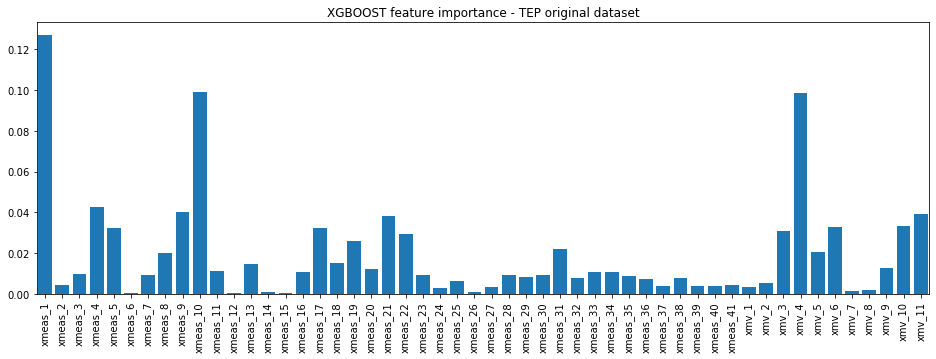

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
ax.set_title("XGBOOST feature importance - TEP original dataset")
ax.bar(range(len(XGBOOST_clf.feature_importances_)), XGBOOST_clf.feature_importances_)
ax.set_xticks(np.arange(0, len(XGBOOST_clf.feature_importances_), step=1))
ax.set_xticklabels(dataset_pd.columns[:-1].values,rotation='vertical')
ax.set_xlim([-0.5,len(XGBOOST_clf.feature_importances_)-0.5])

(-0.5, 51.5)

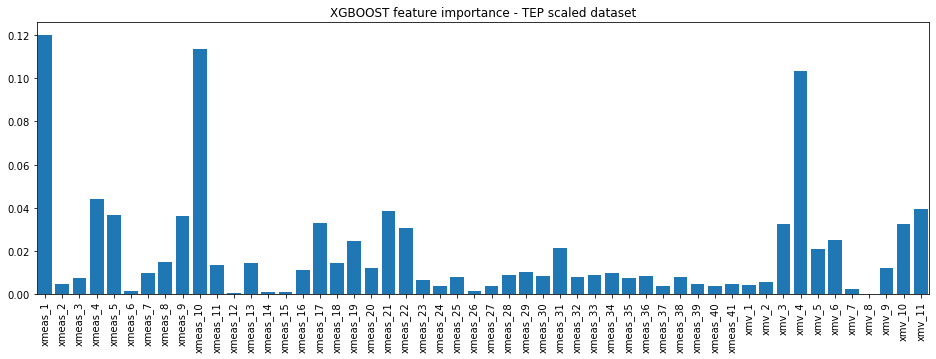

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
ax.set_title("XGBOOST feature importance - TEP scaled dataset")
ax.bar(range(len(XGBOOST_clf.feature_importances_)), XGBOOST_clf.feature_importances_)
ax.set_xticks(np.arange(0, len(XGBOOST_clf.feature_importances_), step=1))
ax.set_xticklabels(dataset_pd.columns[:-1].values,rotation='vertical')
ax.set_xlim([-0.5,len(XGBOOST_clf.feature_importances_)-0.5])